In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge



In [21]:
laptop_data=pd.read_csv('/content/Laptop_price.csv')

In [4]:
laptop_data.head(10)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
5,HP,1.881348,16,256,11.943958,4.840268,9543.719980
6,Lenovo,2.940721,32,256,11.713246,4.344846,10390.137319
7,Lenovo,3.016788,4,256,15.588315,2.941120,9214.484506
8,Lenovo,2.560327,4,512,15.026332,2.743620,16372.175284
9,Acer,3.341111,32,512,13.611945,4.093149,18501.832733


In [5]:
laptop_data.shape

(1000, 7)

In [6]:
laptop_data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [18]:
laptop_data.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [7]:
laptop_data.isnull()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False


In [8]:

laptop_data['Price'].value_counts()
laptop_data['Brand'].value_counts()


,count
Brand,
Dell,210
Asus,206
Acer,204
Lenovo,190
HP,190


<Axes: xlabel='Brand', ylabel='count'>

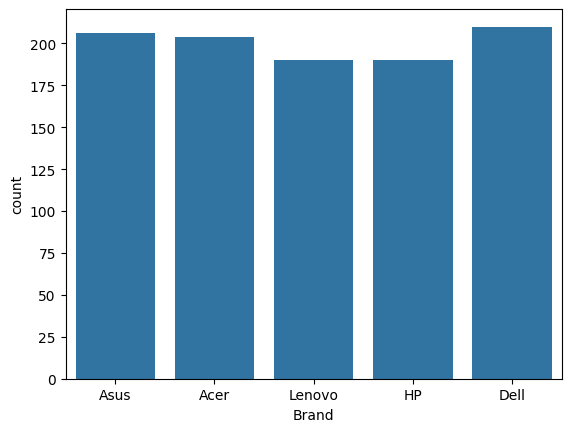

In [9]:
sns.countplot(x='Brand',data=laptop_data)

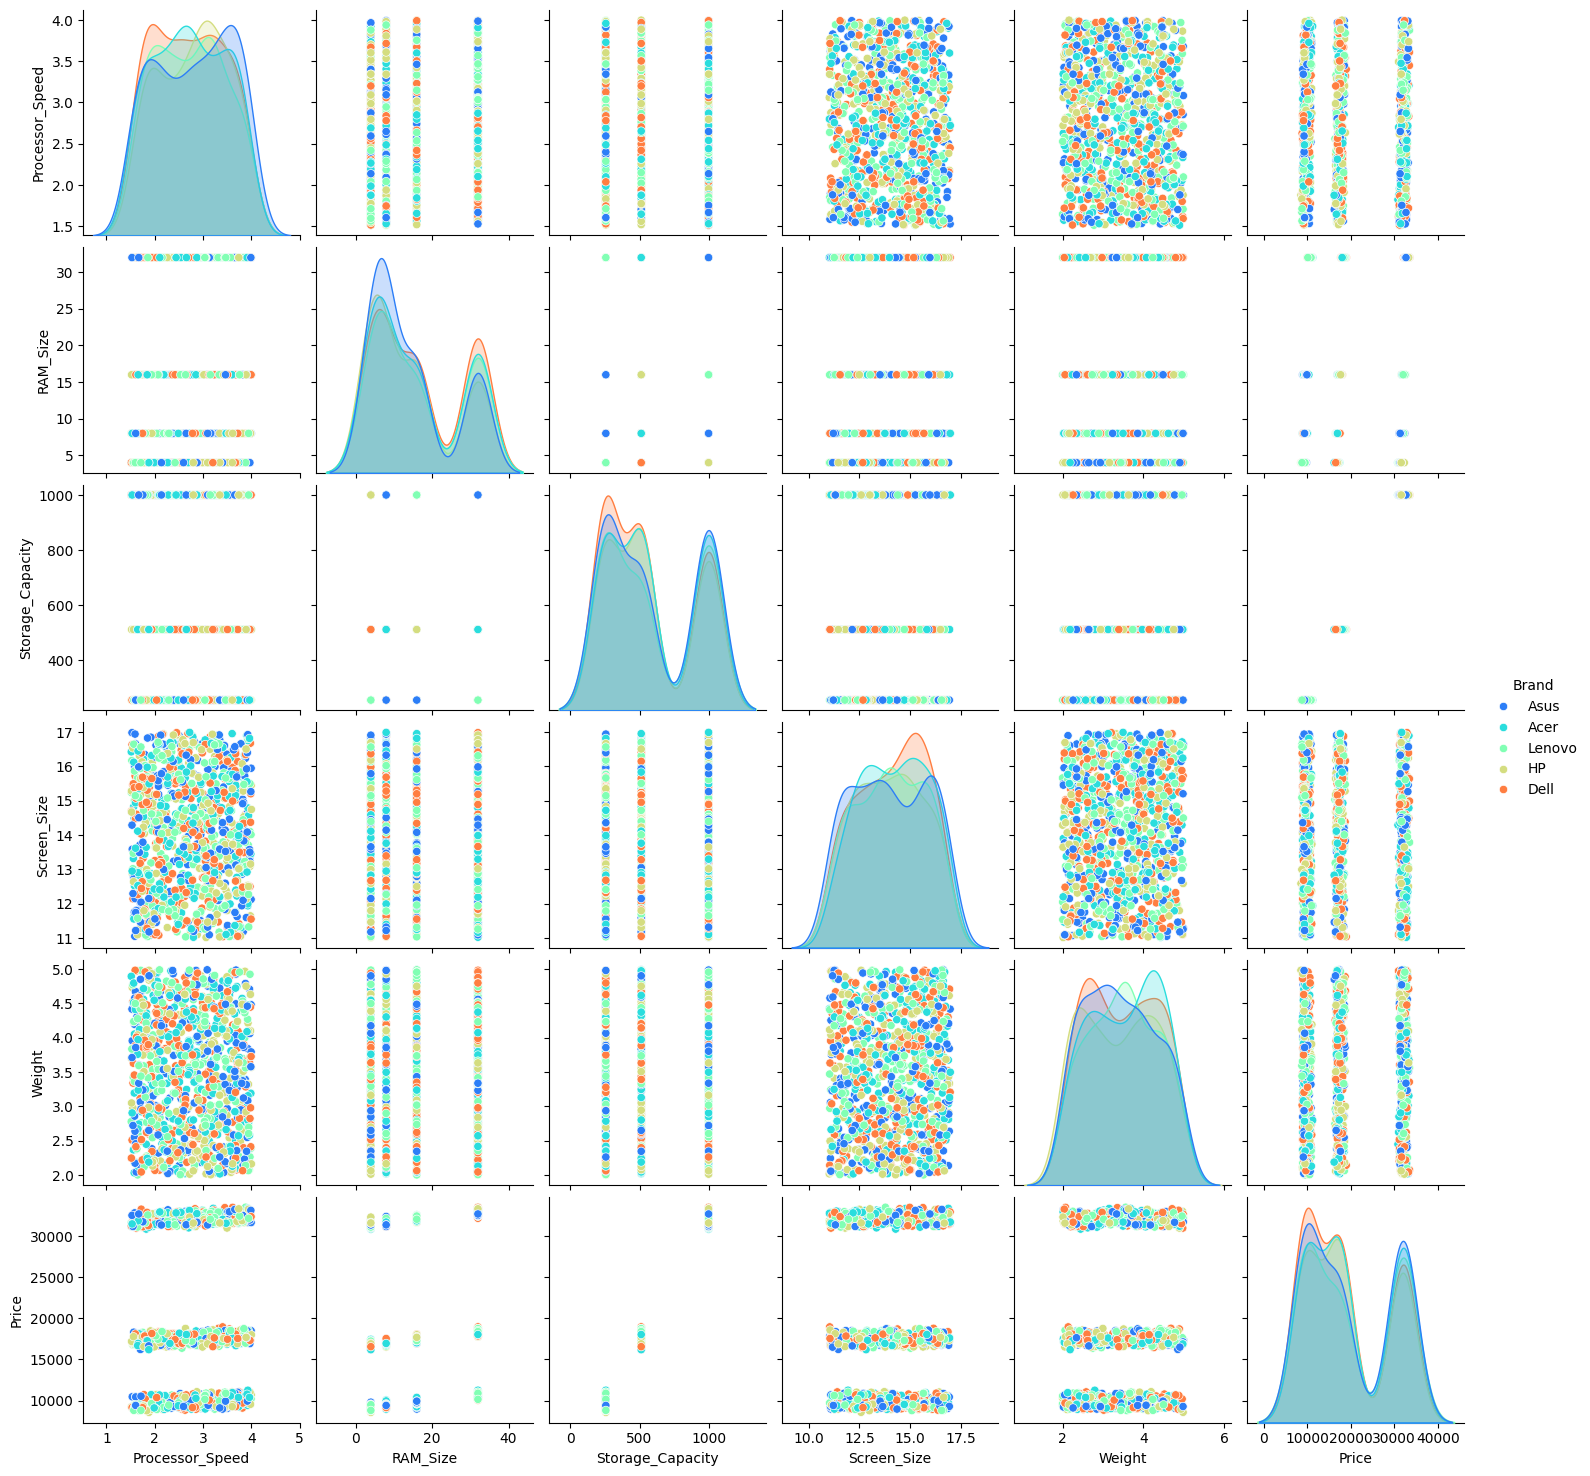

In [10]:
sns.pairplot(laptop_data,hue='Brand',palette='rainbow')

In [24]:
laptop_data = pd.get_dummies(laptop_data, columns=['Brand'])

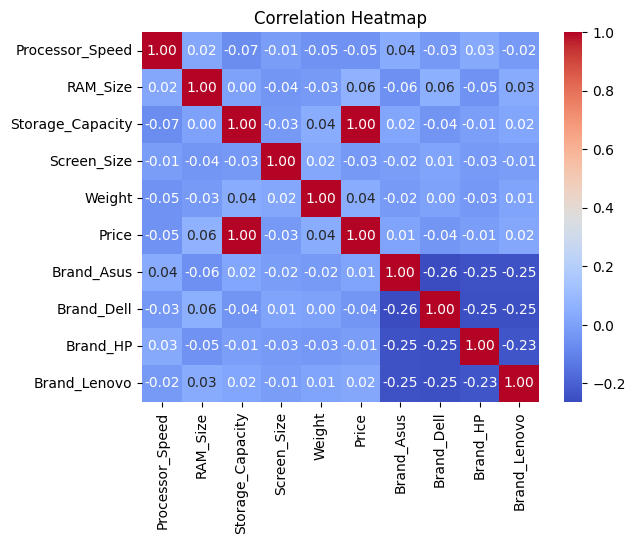

In [12]:

corr_matrix = laptop_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-25-ee52cb1c89a6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Brand_Acer',y='Price',data=laptop_data,palette='rainbow')


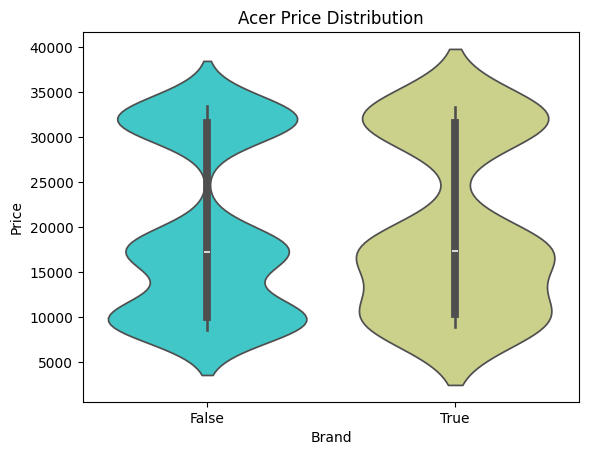

In [25]:
sns.violinplot(x='Brand_Acer',y='Price',data=laptop_data,palette='rainbow')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Acer Price Distribution')
plt.show()

<ipython-input-26-618395a892bb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand_Acer', y='Price', data=laptop_data, palette='rainbow')


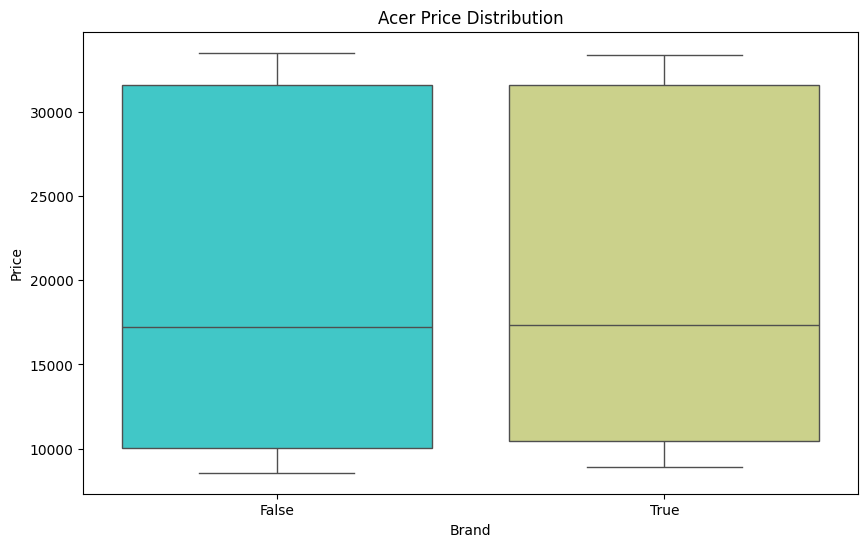

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand_Acer', y='Price', data=laptop_data, palette='rainbow')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Acer Price Distribution')
plt.show()

<ipython-input-77-4abac7d206b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Brand_Acer',y='Price',data=laptop_data,palette='rainbow')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


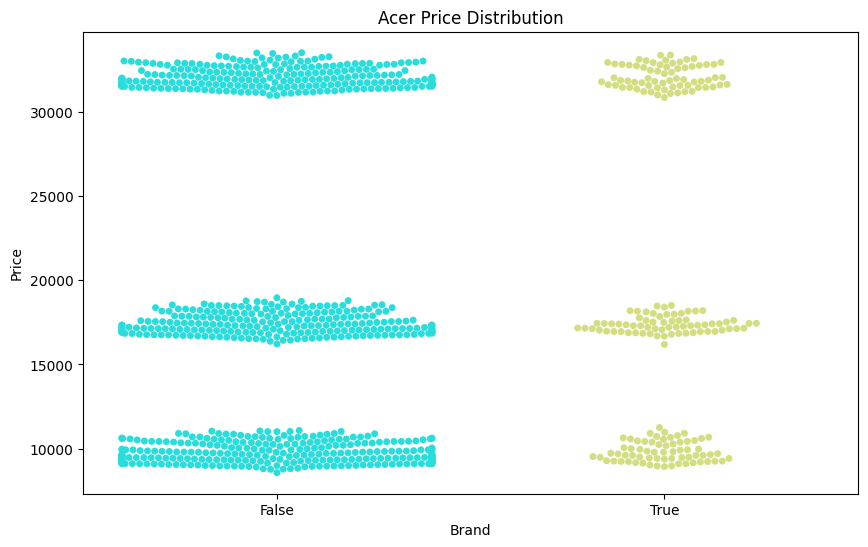

In [77]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Brand_Acer',y='Price',data=laptop_data,palette='rainbow')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Acer Price Distribution')
plt.show()

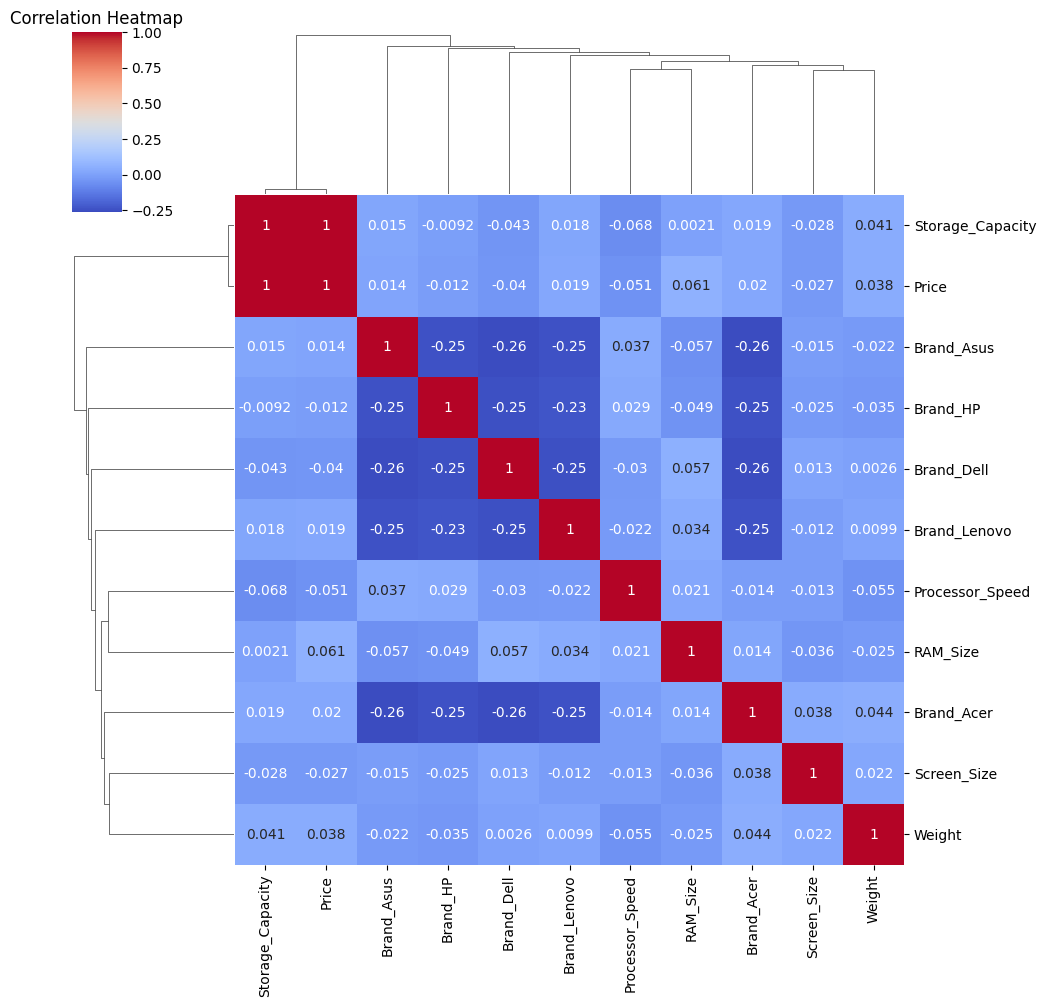

In [27]:
sns.clustermap(laptop_data.corr(),cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
x_train,x_test,y_train,y_test=train_test_split(laptop_data.drop('Price',axis=1),laptop_data['Price'],test_size=0.2,random_state=42)

In [29]:
from sklearn.metrics import mean_squared_error

def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict = model.predict(x_train)
    ytest_predict = model.predict(x_test)

    train_error = np.sqrt(mean_squared_error(y_train, ytrain_predict))
    test_error = np.sqrt(mean_squared_error(y_test, ytest_predict))

    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)

    # Scatter plot for training and testing predictions
    plt.scatter(y_train, ytrain_predict, marker='o', label='Train Predictions')
    plt.scatter(y_test, ytest_predict, marker='^', label='Test Predictions')
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True vs Predicted Values')
    plt.legend()
    plt.show()

    print("Coefficients:")
    print(coefs)

In [30]:
lig_model = LinearRegression()
lig_model.fit(x_train, y_train)

LinearRegression()

Training error (rmse): 199.546183149245
Testing error (rmse): 179.7351866941702


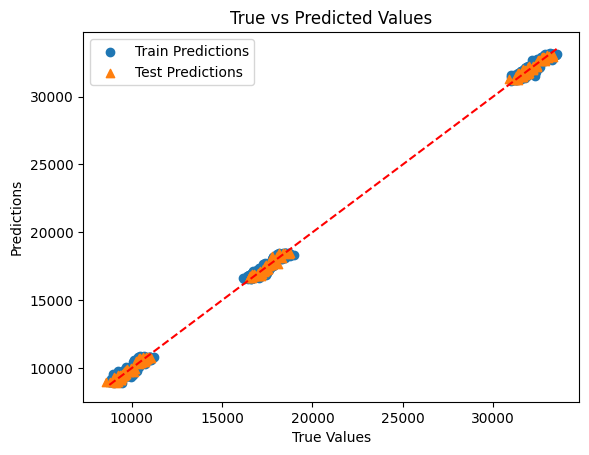

Coefficients:
[496.9928410629436, 198.29373621380384, 50.587145419378274, 29.979621518563242, 19.65915117306752, -7.364084042403727, 10.050758426511436, 16.750873881099608, -20.975723757752505, 3.5361414274197065, -9.362049977278255]


In [31]:
display_results(lig_model)

In [32]:
lig_model.score(x_test,y_test)

0.9996442074396727

In [33]:
lig_model=Lasso()
lig_model.fit(x_train,y_train)


Lasso()

Training error (rmse): 199.6028314852515
Testing error (rmse): 179.38777847792312


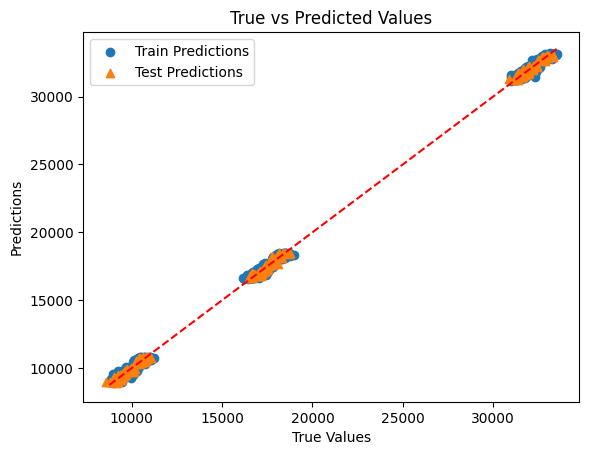

Coefficients:
[505.7414456129336, 196.76674981128585, 50.560371006400594, 29.97961653842571, 19.29085696074639, -6.016112370612006, 1.5926769106838918, 8.501738709088887, -19.849924994892508, 0.0, -7.845504232185235]


In [34]:
display_results(lig_model)

In [35]:
ridge_reg_model=Ridge()
ridge_reg_model.fit(x_train,y_train)

Ridge()

Training error (rmse): 199.5464868040852
Testing error (rmse): 179.72982377544366


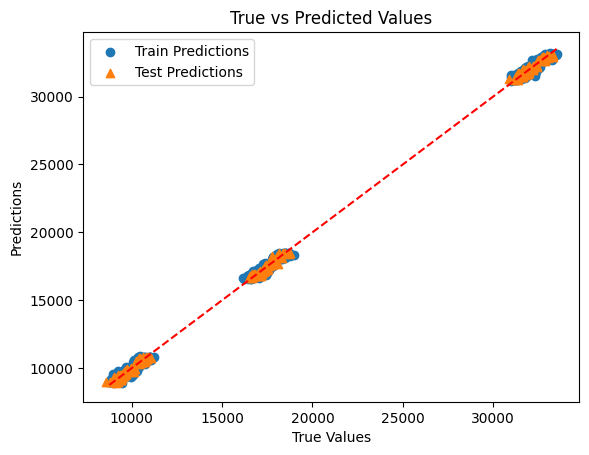

Coefficients:
[498.55140939612465, 197.8252954138785, 50.587049828251494, 29.979570161674012, 19.642880262063603, -7.367107726068994, 9.979547820080953, 16.68855648950879, -20.882406699472828, 3.5437913218259967, -9.329488931234858]


In [36]:
display_results(ridge_reg_model)